<a href="https://colab.research.google.com/github/15021996/Startup-Funding-Prediction/blob/main/Soumya_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(10,6)})
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [20]:
# importing data in a readable format
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 4/Week 4/data_driven_investment_1.csv')

In [21]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [22]:
df = pd.DataFrame.drop_duplicates(df)

In [23]:
df_copy = df.copy()

In [24]:
df_copy.groupby('UUID',)

In [25]:
df.shape

(1412763, 20)

In [26]:
df.isnull().sum().sort_values(ascending =False)

Total Funding (USD)     1410605
City                    1410466
Latest Funded Date      1410459
Business Models         1410459
Practice Areas          1410459
Overview                1410459
Founded Year            1410459
Feed Name               1410459
Company Stage           1410459
MAU                     1294676
Uninstall_Rate          1060560
Total_Session_Time       535098
Open_Rate                535048
Avg_Session_Time         535031
Reach                    451300
UUID                        969
Region                        0
Application Category          0
month                         0
funding_ind                   0
dtype: int64

In [27]:
df['Year'] = df['month'].apply(lambda x : (int(str(x)[:4])))
df['Month'] = df['month'].apply(lambda x : (int(str(x)[4:6])))

In [28]:
# checking for null values in the dataset
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
UUID,969,0.068589
month,0,0.000000
Application Category,0,0.000000
Avg_Session_Time,535031,37.871249
Business Models,1410459,99.836915
City,1410466,99.837411
Company Stage,1410459,99.836915
Feed Name,1410459,99.836915
Founded Year,1410459,99.836915
Latest Funded Date,1410459,99.836915


In [29]:
len(df['Application Category'].value_counts())

48

In [30]:
df.UUID.value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2654
a8febb4b767f83022235f3f34a2241ed1e13db2f    1670
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1529
ec1cd22193eda5ec91905247ea3079ae84e2dd30    1224
03fb932e41ef68f1df45e0b20f326de05ebd438c    1086
                                            ... 
9bc582943d092132df6a2eab427287b191fb3049       1
ad28dba28a3fcded2d79ec19aaa0d1ae435d58f9       1
e027e369d32c6c4b6e92991d16cb5c5c35b5fa8c       1
04f90c88f4255e597c05bb1a9fff4dc5e635986b       1
f5cdbf87d9286c25432233f266dfead46349e92e       1
Name: UUID, Length: 147741, dtype: int64

In [31]:
df.Avg_Session_Time.value_counts()

0.010083    13
0.013100    13
0.015633    12
0.007217    12
0.005583    12
            ..
1.662669     1
0.186156     1
0.411762     1
0.507527     1
3.197290     1
Name: Avg_Session_Time, Length: 830645, dtype: int64

In [32]:
df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                                                                                                                                      195
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                                                                                                                       113
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter                                                                                                           113
Influencer E-Commerce > Live Video\nVideo Commerce > Live Stream Commerce                  

In [33]:
df.City.value_counts()

Bangalore                   677
Gurgaon                     485
Delhi                       437
Mumbai                      352
Kingstown\nMumbai            96
Pune                         65
Noida                        35
Hyderabad                    28
Chennai                      21
San Mateo\nChennai           21
Ahmedabad                    16
Jaipur                        7
Kolkata                       7
Kota                          6
Dublin\nBangalore             6
Singapore\nGurgaon            5
San Francisco\nBangalore      3
London                        3
Bhopal                        3
Bangalore\nMumbai             3
Panaji                        3
Coimbatore                    3
Hangzhou\nDelhi               3
Singapore\nBangalore          3
Kochi                         2
Chicago\nNoida                2
Fremont\nMumbai               2
Kanpur                        1
London\nNoida                 1
Faridabad                     1
Name: City, dtype: int64

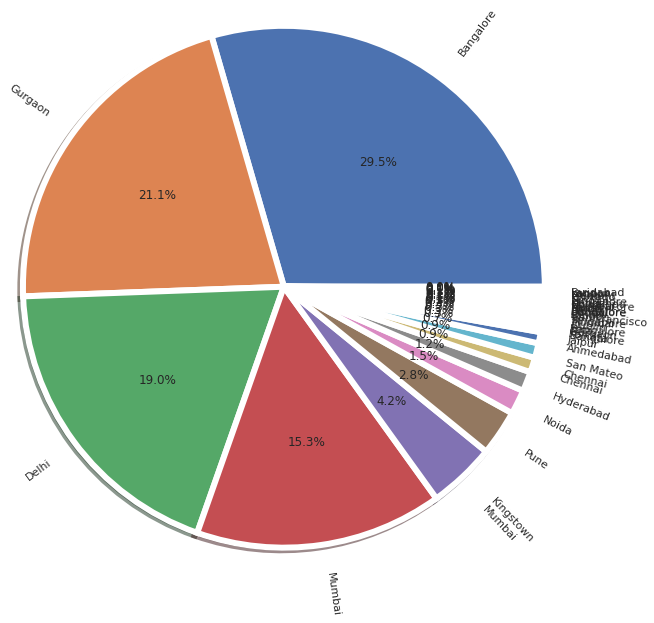

In [34]:
# font={'weight' : 'bold',
#         'size': 14}

# ###############################################################
# #                   Count plot with Hue                       #                                                             
# ###############################################################

# plt.figure(figsize=(20,20))
# ax=sns.countplot(df["City"].dropna(),hue=df["funding_ind"])
# plt.title("Continent of company",**font)
# plt.ylabel("count of companies")
# plt.yticks(rotation=30,**font)
# plt.xticks(**font)

# # create a list to collect the plt.patches data
# for i in ax.patches:
#     ax.text(i.get_x(),i.get_height(),str(round((i.get_height()), 2)), fontsize=16, color='Black',rotation=45)
    
# plt.show()
###############################################################
#                       pie plot                              #
###############################################################

df["City"].value_counts().astype(int).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True,wedgeprops={'linewidth': 6},radius=2)
plt.show()

Maximum start-ups from Bangalore got funded.

## Looking at the Target Variable(We have imbalanced dataset)

In [35]:
df.funding_ind.value_counts()

0    1410459
1       2304
Name: funding_ind, dtype: int64

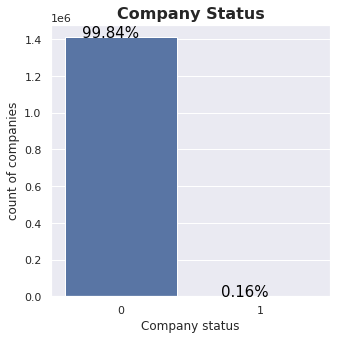

In [36]:
# checking the dependent variable --> `Company status`
plt.figure(figsize=(5,5))
ax=sns.countplot(df["funding_ind"])
plt.title("Company Status",{'fontsize':16,
        'fontweight':"bold"})

plt.ylabel("count of companies")
plt.xlabel("Company status")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

## Exploring features

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

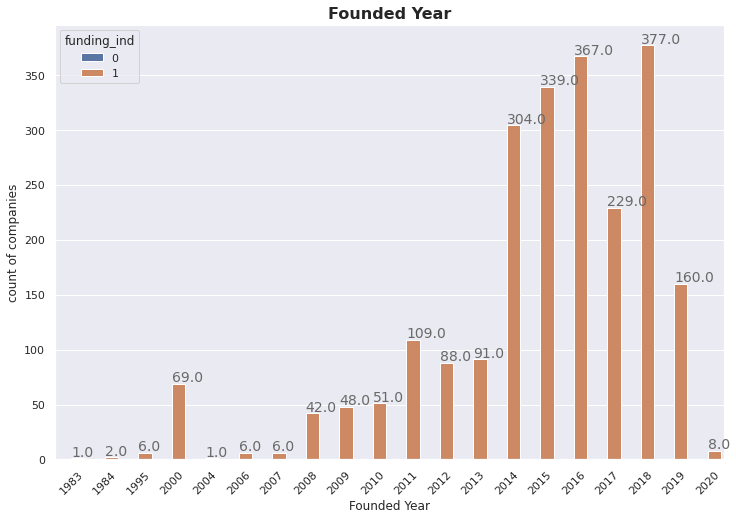

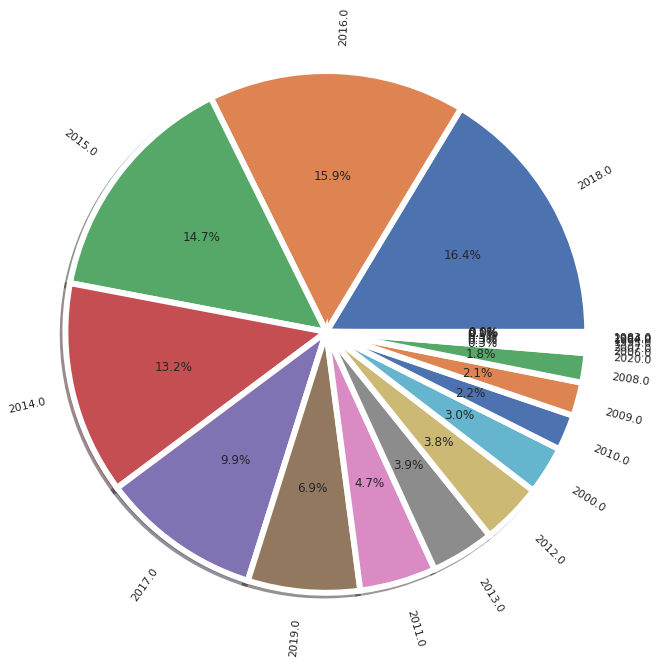

In [37]:
font={'weight' : 'bold','size': 16}
plt.figure(figsize=(12,8))
ax=sns.countplot(df["Founded Year"].dropna().astype(int),hue=df["funding_ind"])
plt.title("Founded Year",**font)
plt.ylabel("count of companies")
plt.xticks(rotation=45)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.show()
(df["Founded Year"].value_counts()).plot.pie(autopct="%.1f%%",shadow=True,rotatelabels=True,wedgeprops={'linewidth': 6},radius=2)
plt.show()

<Figure size 576x576 with 0 Axes>

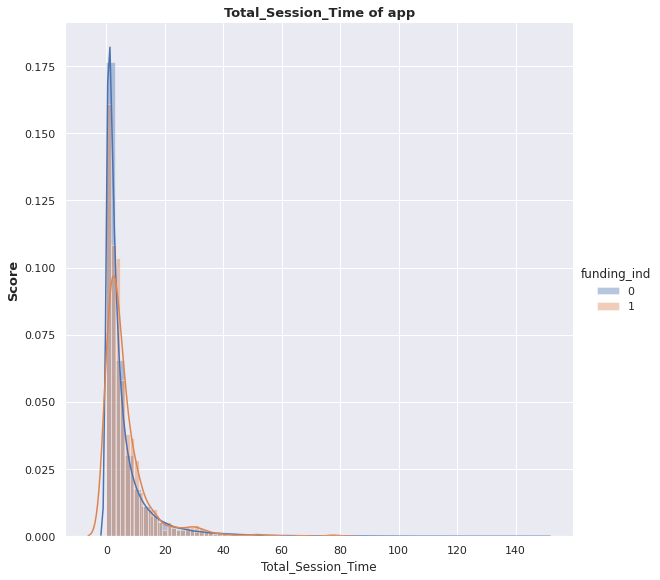

In [38]:
font={'weight' : 'bold',
        'size': 13}
plt.figure(figsize=(8,8))
###############################################################
#              distribution plot with hue                     #
###############################################################

sns.FacetGrid(df,hue='funding_ind',height=8)\
    .map(sns.distplot,'Total_Session_Time')\
    .add_legend()
plt.title("Total_Session_Time of app",**font)
plt.ylabel("Score",**font)
plt.show()

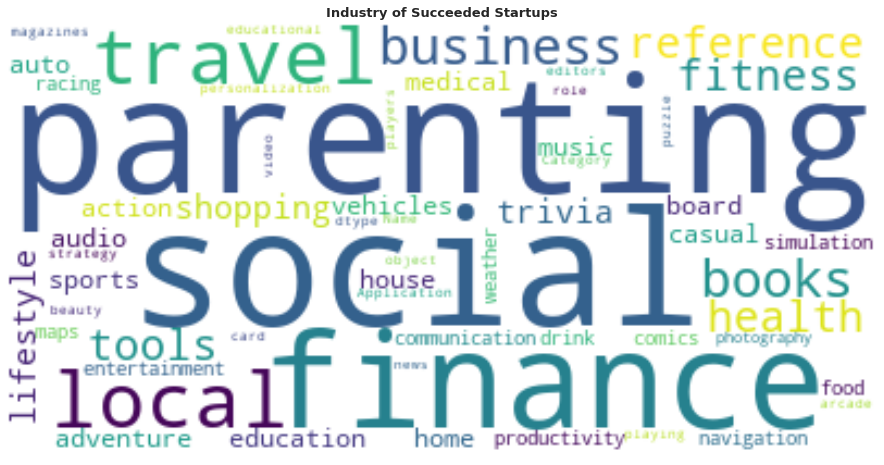

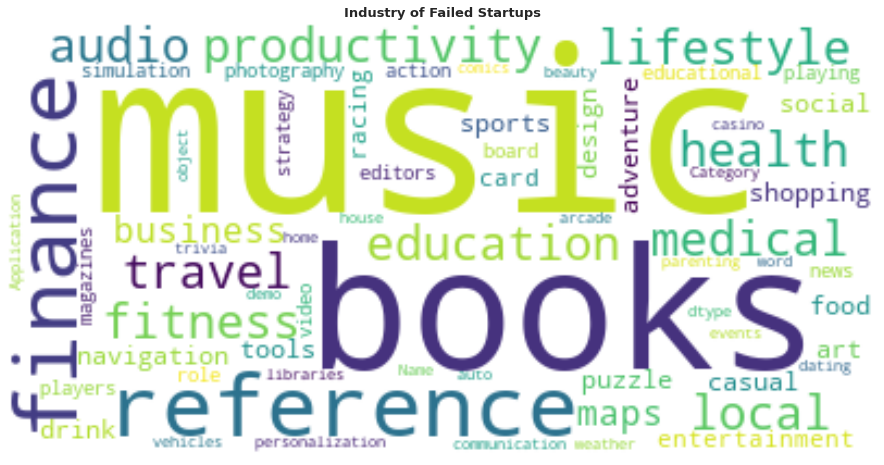

In [39]:
# industry of company which succeeded
success=df[df['funding_ind']==1]
text2 =success["Application Category"].replace({"'":" "}).str.lower().dropna().drop_duplicates()
plt.figure(figsize=(16,8))
# Create and generate a word cloud image:
wordcloud2 = WordCloud(background_color='white').generate(str(text2))
# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Industry of Succeeded Startups",**font)
plt.show()
# industry of company which failed
failed=df[df['funding_ind']==0]
text3 =failed["Application Category"].replace({"'":" "}).str.lower().dropna().drop_duplicates()
plt.figure(figsize=(16,8))
# Create and generate a word cloud image:
wordcloud3 = WordCloud(background_color='white').generate(str(text3))
# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title("Industry of Failed Startups",**font)
plt.axis("off")
plt.show()

## Analysing only the funded startups

In [40]:
df_funded = df[df['funding_ind'] == 1]

In [42]:
df_funded.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Year,Month
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1,2018,8
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018,8
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018,8
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1,2018,8
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1,2018,8


In [43]:
df_funded.Year.value_counts()

2020    1413
2019     785
2018     106
Name: Year, dtype: int64

In [44]:
# checking for null values in the dataset
null=pd.DataFrame(df_funded.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df_funded.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
UUID,0,0.000000
month,0,0.000000
Application Category,0,0.000000
Avg_Session_Time,738,0.052238
Business Models,0,0.000000
City,7,0.000495
Company Stage,0,0.000000
Feed Name,0,0.000000
Founded Year,0,0.000000
Latest Funded Date,0,0.000000


In [45]:
df_funded['City']=df_funded['City'].replace({'Kingstown\nMumbai': 'Mumbai', 'Fremont\nMumbai': 'Mumbai', 'San Mateo\nChennai': 'Chennai', 'Dublin\nBangalore': 'Bangalore','Singapore\nBangalore': 'Bangalore','San Francisco\nBangalore': 'Bangalore','Singapore\nGurgaon': 'Gurgaon','Hangzhou\nDelhi': 'Delhi','Chicago\nNoida': 'Noida','London\nNoida': 'Noida'})

In [46]:
df_funded.nlargest(5, ['Total Funding (USD)']) 

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Year,Month
586621,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Shopping,2.306675,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.725223,4.501723,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.422252,National,7.201430e+09,10.361766,0.023394,1,2020,6
586622,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Business,0.788551,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.562418,9.968127,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001076,National,7.201430e+09,7.637852,0.108967,1,2020,6
593461,cda9435bb7af9ee517fe018080d7f081a36c9397,20200601,Social,4.959111,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.517502,5.633894,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001452,National,7.201430e+09,27.556655,0.228422,1,2020,6
24149,419df2c466071859c528020b57899e7c9987a438,20190601,Shopping,NaN,Horizontal E-Commerce > Marketplace,Delhi,Series H,Horizontal E-Commerce,2010.0,2019-07-23,NaN,NaN,Online marketplace for multi-category products,Retail\nCovid-19,0.109756,National,1.773395e+09,NaN,0.155464,1,2019,6
24150,419df2c466071859c528020b57899e7c9987a438,20190601,Business,NaN,Horizontal E-Commerce > Marketplace,Delhi,Series H,Horizontal E-Commerce,2010.0,2019-07-23,NaN,NaN,Online marketplace for multi-category products,Retail\nCovid-19,0.000366,National,1.773395e+09,NaN,0.064057,1,2019,6


Text(0, 0.5, 'Funding total (USD)')

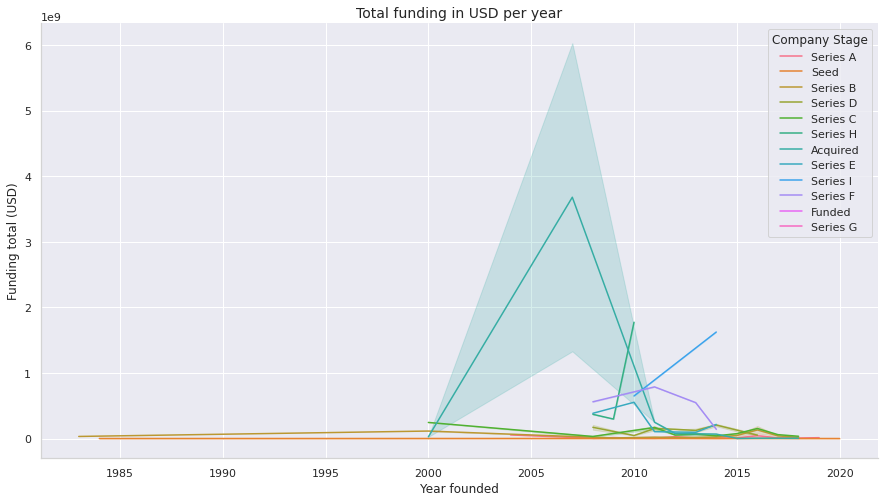

In [47]:
%matplotlib inline
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
# Variables that define subsets of the data, which will be drawn on separate facets in the grid.
sns.lineplot(x=df_funded['Founded Year'],y=df_funded['Total Funding (USD)'],hue='Company Stage',data=df_funded)
# Declutter graph
sns.despine(offset=0, trim=False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
# Title and Labels
plt.title('Total funding in USD per year',fontsize=14)
plt.xlabel('Year founded',fontsize=12)
plt.ylabel('Funding total (USD)',fontsize=12)

In [48]:
plot_data = df_funded[df_funded['Founded Year'] > 1985]
plot_data = plot_data.sort_values('Founded Year',ascending=True)

%matplotlib inline
fig = plt.figure(figsize=(80,80))
ax = fig.add_subplot(111)
sns.countplot(y=plot_data['Founded Year'].astype(int),color='lightgray')
#Get rid of top and right border:
sns.despine(offset=0, trim=False)
# Change the colors of the left and bottom borders (fade into the background)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
# Attract attention
# ax.patches[15].set_fc('cornflowerblue')
# ax.patches[17].set_fc('cornflowerblue')
# Annotate the figure
#ax.text(4800, 6, 'Most startups were created in the years \textcolor{blue}{2011 and 2012}', ha='right', va='top', fontsize=22)
plt.annotate('Most startups were created\nin the years 2011 and 2012.',
             xy=(3300,4),xytext=(3300,4),color='cornflowerblue',fontsize=14)

# ncount = len(df_funded['Founded Year'])
# for p in ax.patches:
#    x=p.get_bbox().get_points()[:,0]
#    y=p.get_bbox().get_points()[1,1]
#    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
#            ha='center', va='bottom') # set the alignment of the text

plt.title('Startup frequency per year',fontsize=14)
plt.xlabel('Number of Startups',fontsize=12)
plt.ylabel('Year founded',fontsize=12)

Text(0, 0.5, 'Year founded')

Text(0, 0.5, 'Year founded')

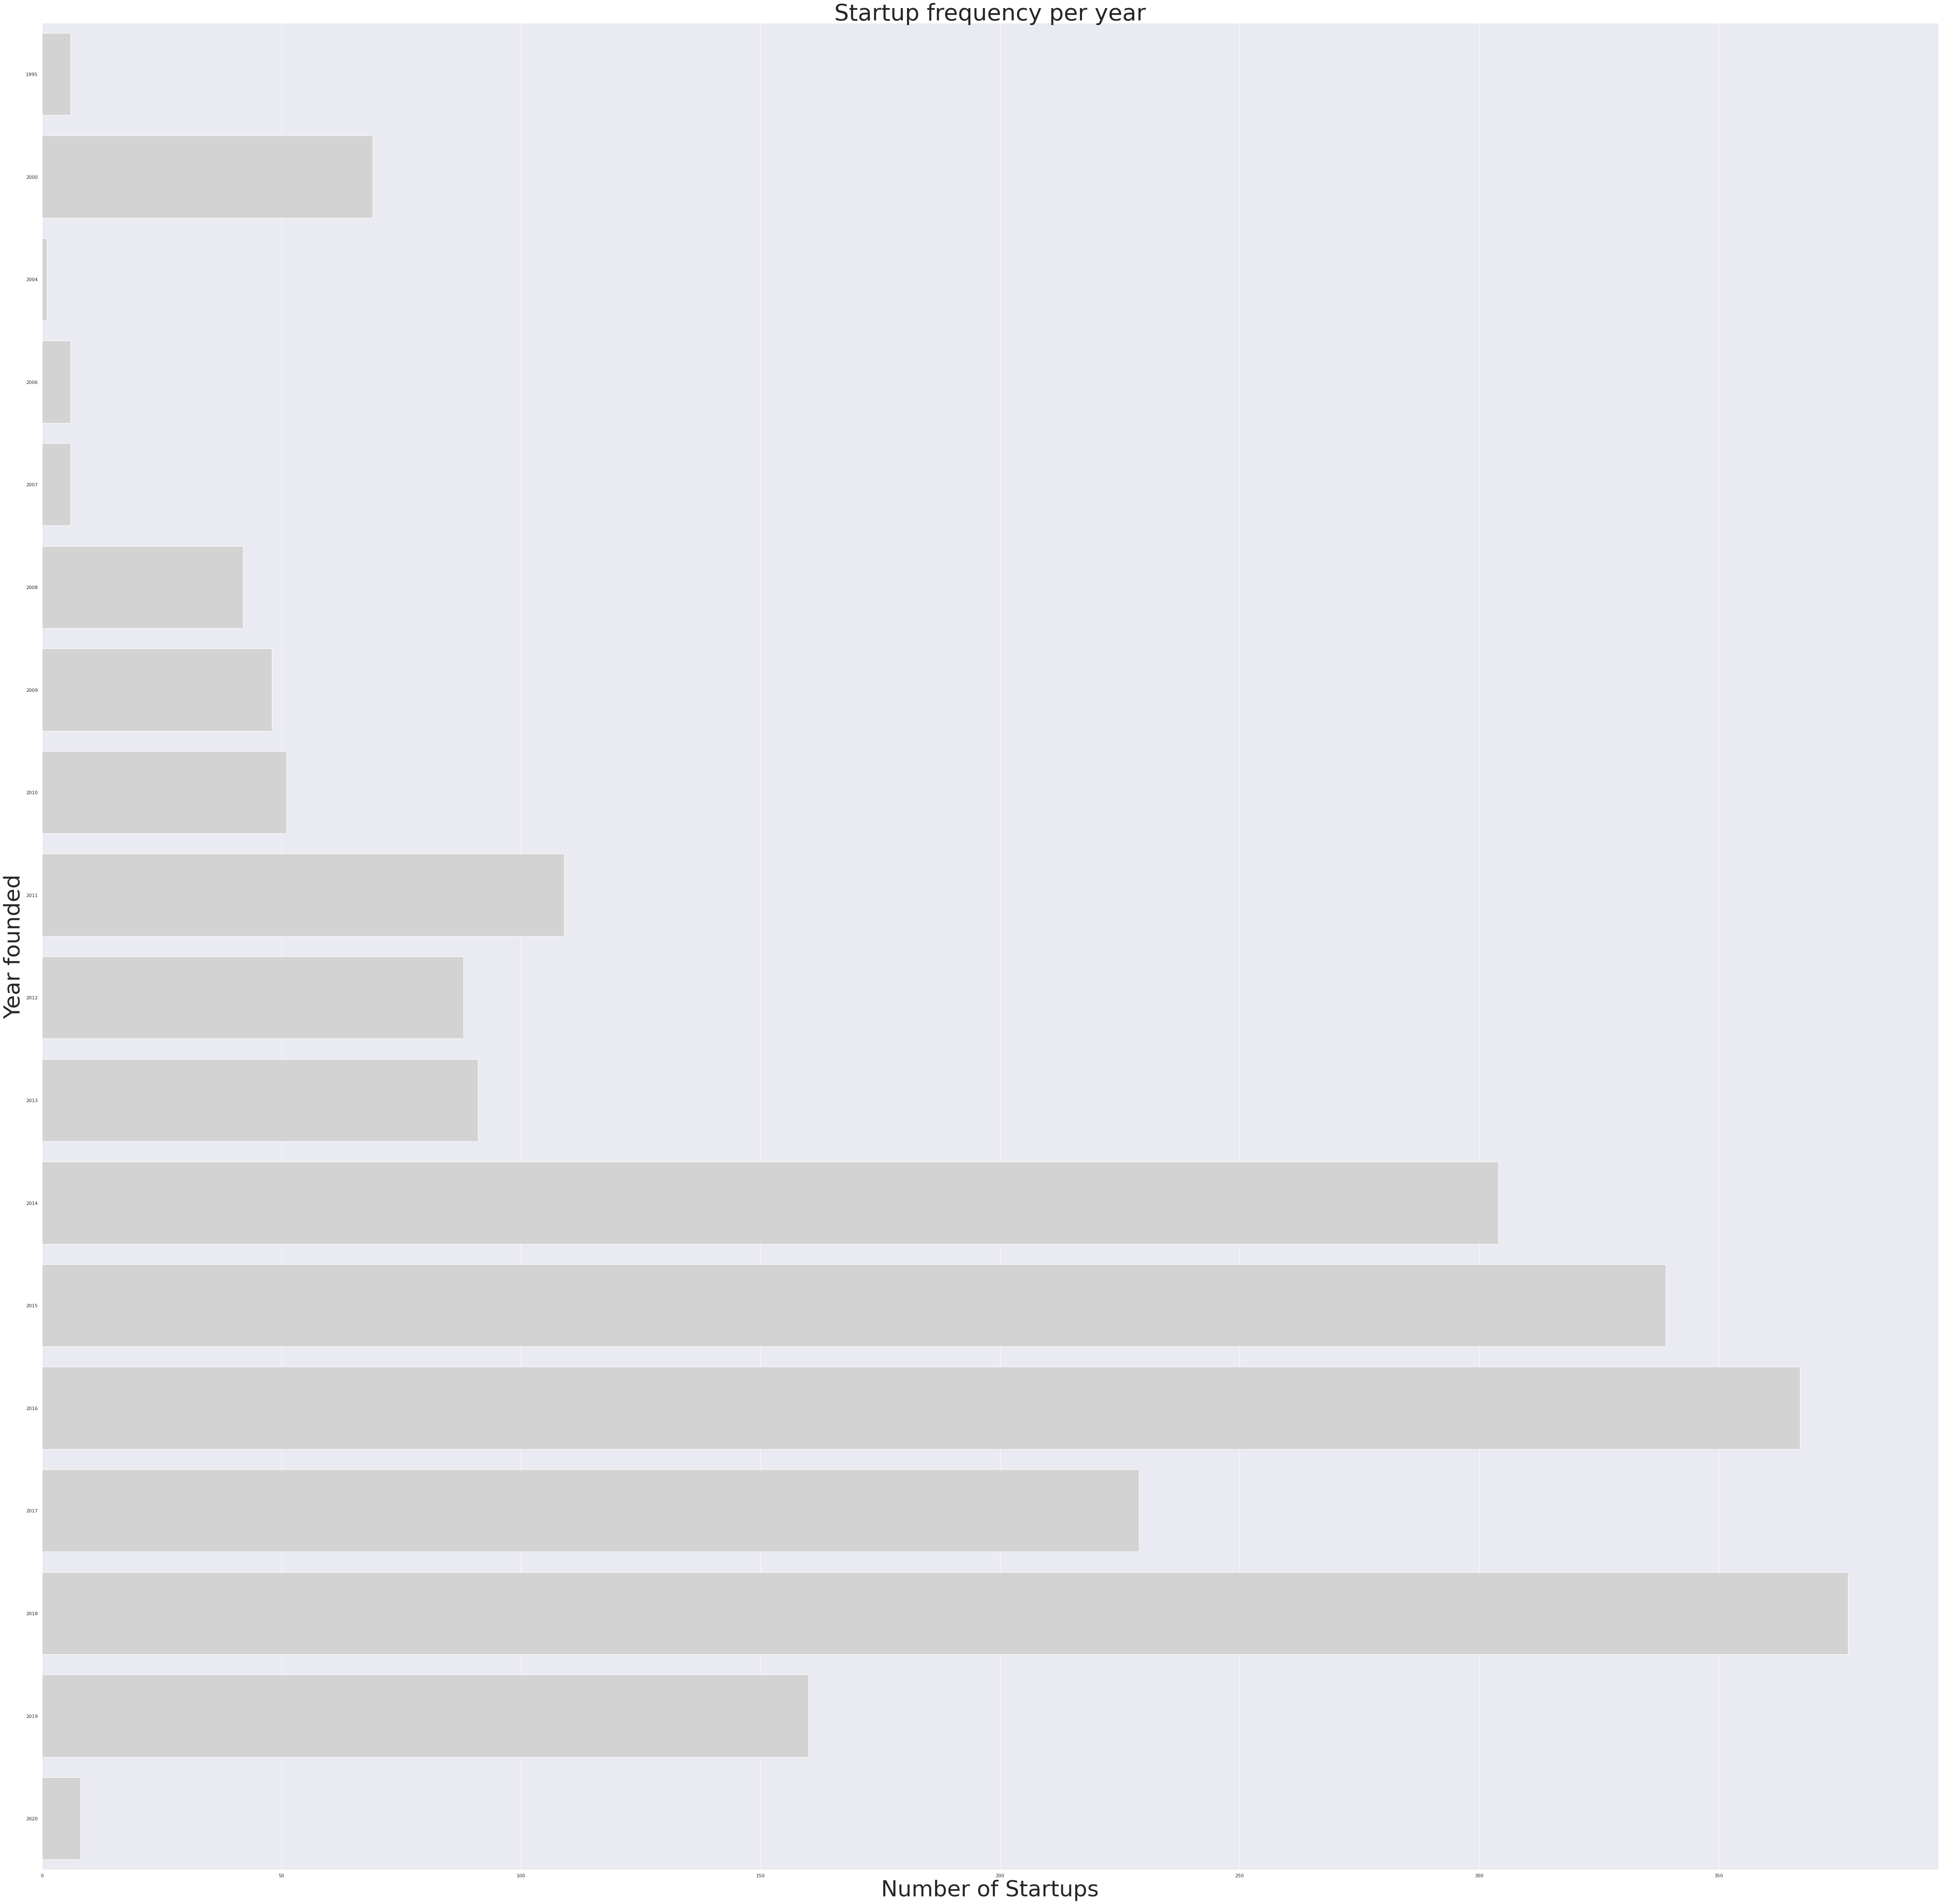

In [49]:
plot_data = df_funded[df_funded['Founded Year'] > 1985]
plot_data = plot_data.sort_values('Founded Year',ascending=True)

%matplotlib inline
fig = plt.figure(figsize=(80,80))
ax = fig.add_subplot(111)
sns.countplot(y=plot_data['Founded Year'].astype(int),color='lightgray')
plt.title('Startup frequency per year',fontsize=54)
plt.xlabel('Number of Startups',fontsize=52)
plt.ylabel('Year founded',fontsize=52)

Text(0, 0.5, 'Number of startups')

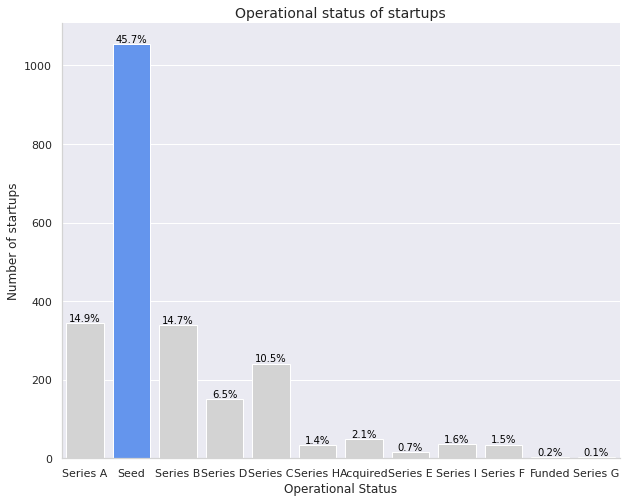

In [50]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
sns.countplot(df_funded['Company Stage'],color='lightgray')
#Get rid of top and right border:
sns.despine(offset=0, trim=False)
# Change the colors of the left and bottom borders (fade into the background)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
# Attract attention
ax.patches[1].set_fc('cornflowerblue')

ncount = len(df_funded['Company Stage'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom',color='black') # set the alignment of the text
plt.title('Operational status of startups',fontsize=14)
plt.xlabel('Operational Status',fontsize=12)
plt.ylabel('Number of startups',fontsize=12)

In [51]:
print("Maximum funding to a Startups is : ",df_funded["Total Funding (USD)"].dropna().sort_values().max())

Maximum funding to a Startups is :  7201429984.0


In [52]:
df_funded[df_funded['Total Funding (USD)'] == 7201429984]

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Year,Month
586621,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Shopping,2.306675,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.725223,4.501723,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.422252,National,7.201430e+09,10.361766,0.023394,1,2020,6
586622,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Business,0.788551,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.562418,9.968127,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001076,National,7.201430e+09,7.637852,0.108967,1,2020,6
593461,cda9435bb7af9ee517fe018080d7f081a36c9397,20200601,Social,4.959111,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.517502,5.633894,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001452,National,7.201430e+09,27.556655,0.228422,1,2020,6


In [53]:
df_funded['month']=pd.to_datetime(df_funded['month'],format='%Y%m%d')

In [54]:
dnewdf=df_funded.set_index('month')
dnewdf.head()

,UUID,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Year,Month
month,,,,,,,,,,,,,,,,,,,,,
2018-08-01,0de5c3fb8362718a71754d77061259c809266dd1,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1,2018,8
2018-08-01,1579dd1ed49a18f4f7520a91721c6e435f7c588e,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018,8
2018-08-01,cae68bf26bf59549fac77ec044954f939ab28c28,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018,8
2018-08-01,9d17e60de4c6bb504d258872b6cc0bffd09de171,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1,2018,8
2018-08-01,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1,2018,8


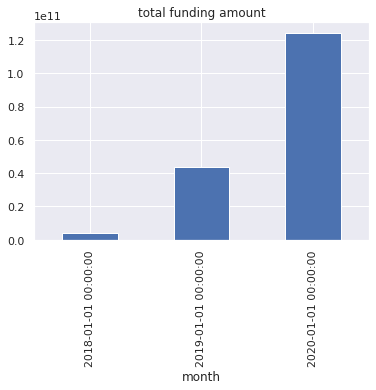

In [55]:
q=dnewdf['Total Funding (USD)'].resample('AS').mean()
plt.title('total funding amount')
dnewdf.resample('AS')['Total Funding (USD)'].sum().plot.bar()
plt.show()

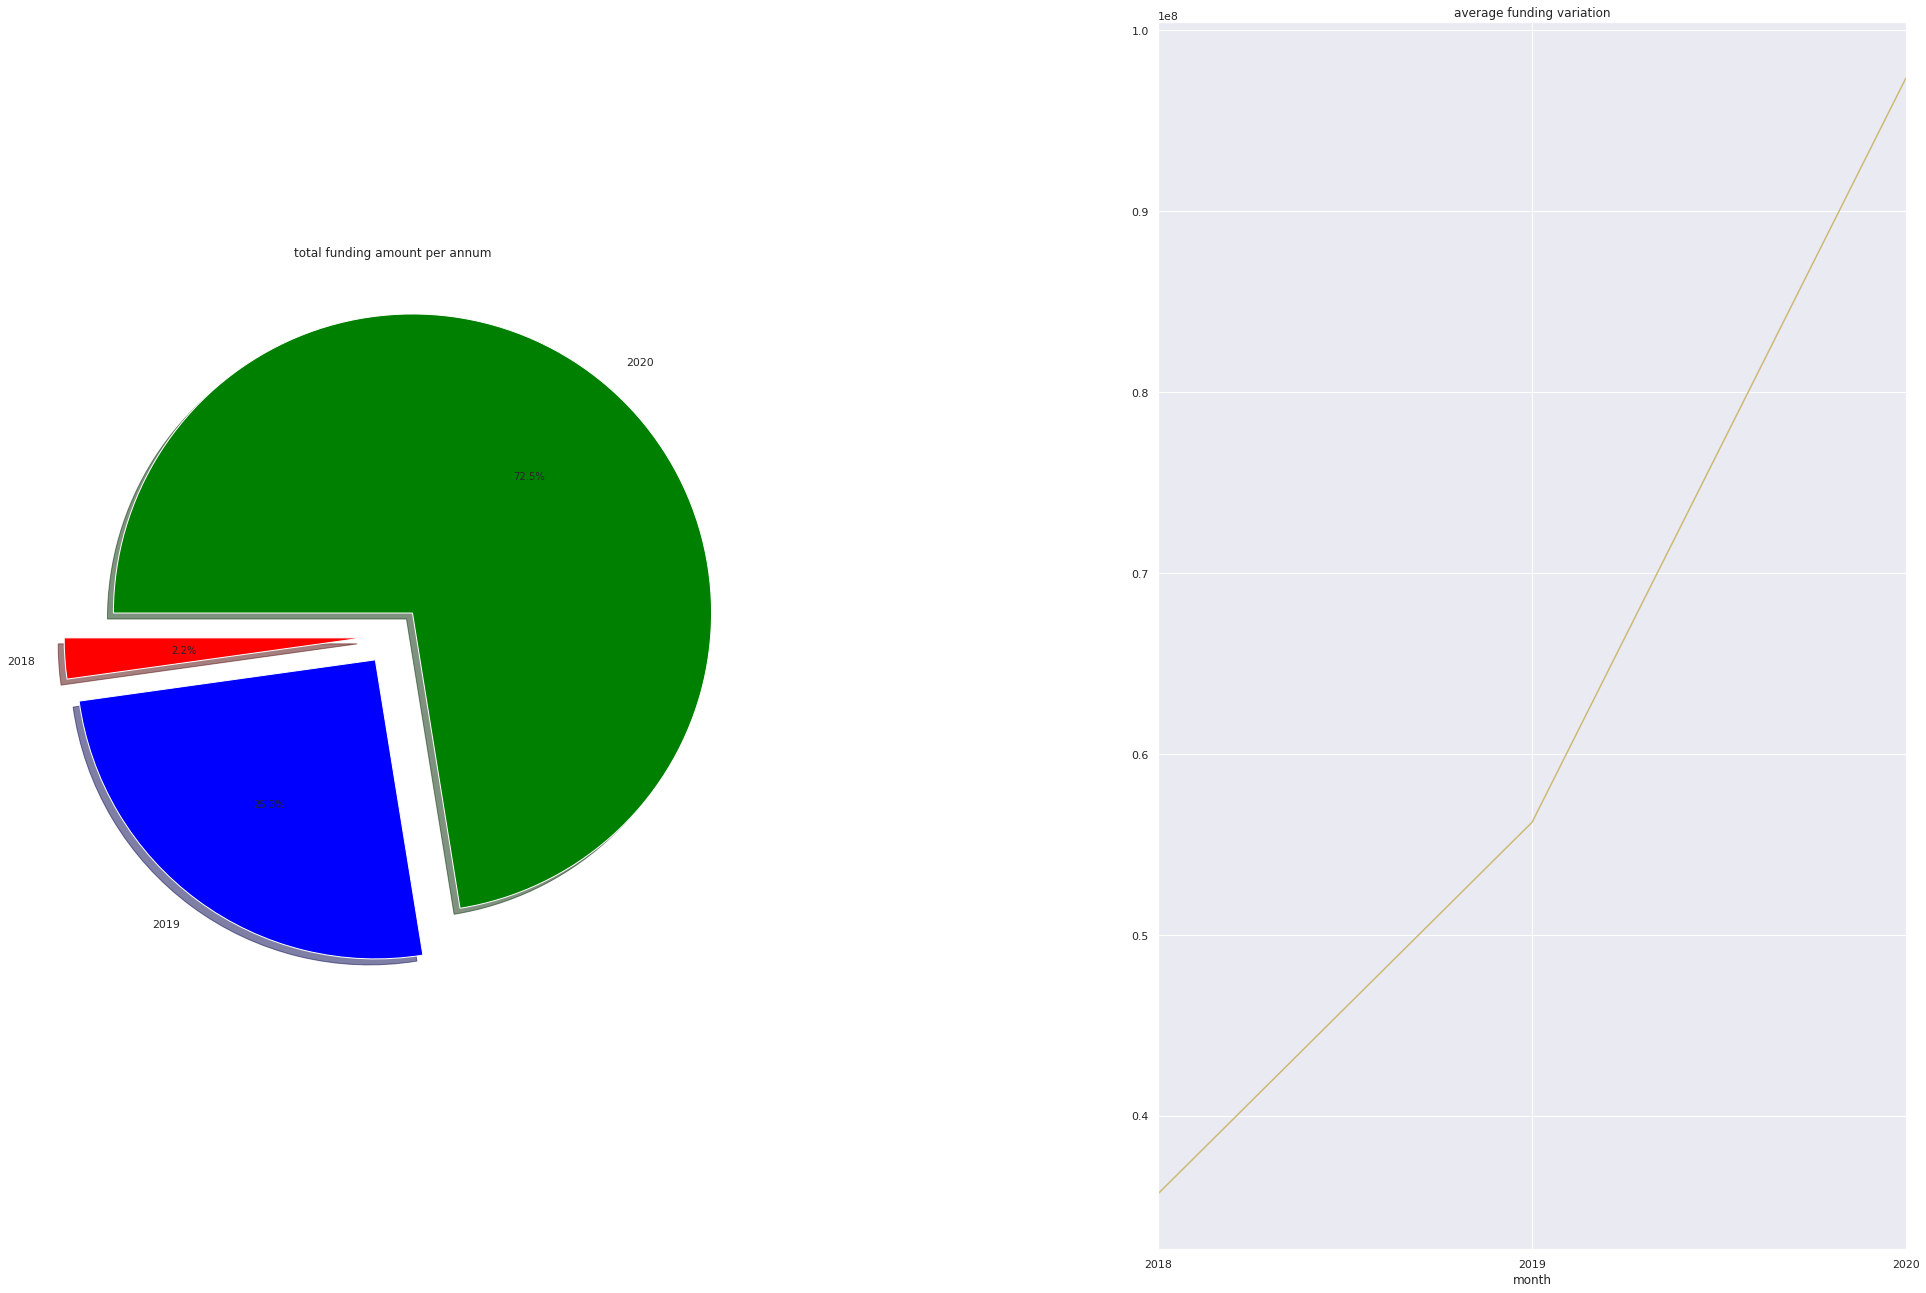

In [56]:
a=dnewdf['Total Funding (USD)'].resample('AS').sum()
fig,ax=plt.subplots(nrows=1,ncols=2)

fig.tight_layout(pad=3) # Or equivalently,  "plt.tight_layout()"
fig.set_figheight(24)
fig.set_figwidth(34)

explode = (0.1, 0.1, 0.1)
ax[0].pie(a,autopct='%1.1f%%',shadow=True,startangle=180,explode=explode,colors=['red','blue','green'],labels=['2018','2019','2020'])
ax[0].set_title('total funding amount per annum')

q.plot(color='y',ax=ax[1])
ax[1].set_title('average funding variation')
plt.show()

Text(0.5, 1.0, 'Funding Variation Per Month from 2018-2020')

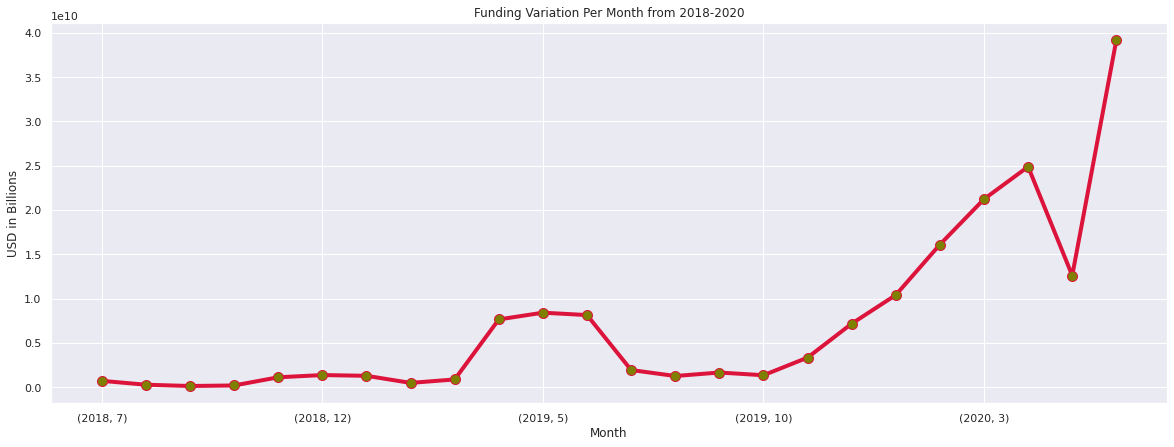

In [57]:
fig =plt.figure(figsize=(20,7))
fig.set_figheight
ts_month = df_funded.groupby(['Year', 'Month']).agg({'Total Funding (USD)':'sum'})['Total Funding (USD)']
ts_month.plot(linewidth=4, color='crimson',marker="o", markersize=10, markerfacecolor='olive')
plt.ylabel('USD in Billions')
plt.xlabel('Month');
plt.title('Funding Variation Per Month from 2018-2020')

## Data for Classification

In [58]:
classification_features = ['UUID',
 'month',
 'Application Category',
 'Avg_Session_Time',
 'Open_Rate',
 'Reach',
 'Total_Session_Time',
 'funding_ind']

In [59]:
clf_df = df[classification_features]

In [60]:
clf_df.isnull().sum()

UUID                       969
month                        0
Application Category         0
Avg_Session_Time        535031
Open_Rate               535048
Reach                   451300
Total_Session_Time      535098
funding_ind                  0
dtype: int64

In [61]:
def changeTodate(x):
  month = str(x)[4:6]
  day = str(x)[6:]
  year = str(x)[0:4]
  date = day+'/'+month+'/'+year
  return int(day),int(month),int(year),date
  # return pd.to_datetime(date,format='dd/mm/yy')


In [62]:
clf_df['observed day'] = clf_df['month'].apply(lambda x:changeTodate(x)[0])
clf_df['observed month'] = clf_df['month'].apply(lambda x: changeTodate(x)[1])
clf_df['observed year'] = clf_df['month'].apply(lambda x: changeTodate(x)[2])

In [63]:
def fill_missing(dataframe):
  new_data = pd.DataFrame(columns=dataframe.columns)
  Category_list = dataframe['Application Category'].value_counts().index.to_list()
  years = dataframe['observed year'].value_counts().index.to_list()
  for i in Category_list:
    temp = dataframe[dataframe['Application Category']==i]
    for y in years:
      temp1 = temp[temp['observed year']==y]
      temp1.fillna(method='ffill', limit = 2, inplace = True)
      temp1.fillna(method='backfill', limit = 1, inplace = True)
      new_data = pd.concat([new_data, temp1])
  
  new_data_1 = pd.DataFrame(columns=dataframe.columns)
  for i in Category_list:
    temp = new_data[new_data['Application Category']==i]
    for y in years:
      temp1 = temp[temp['observed year']==y]
      temp1.fillna(temp1.mean(), inplace = True)
      new_data_1 = pd.concat([new_data_1, temp1])

  Final_data = pd.DataFrame(columns=dataframe.columns)  
  for i in Category_list:
    temp = new_data_1[new_data_1['Application Category']==i]
    temp.fillna(temp.mean(), inplace = True)
    Final_data = pd.concat([Final_data, temp])

  return Final_data

In [64]:
final_df = fill_missing(clf_df)

In [65]:
final_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed day,observed month,observed year
125725,615ff89844fb9b8804559eedab5f13f569b8c63c,20200301,Education,0.799037,3.571429,9.860441e-06,3.285362,0,1,3,2020
125730,4096f9f35c2efe32751614b5de6ca4966d770b41,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
125759,ea1d85c85770124a6ec1904843f066a3a7d09b0a,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
125770,c495446fe78d349ba3a51b12029d4343e4ed8001,20200301,Education,1.504202,3.132185,1.972088e-07,4.991432,0,1,3,2020
125775,caf0ec13bb28fc975d5c3a1fabed988c753c7af2,20200301,Education,1.504202,3.132185,1.972088e-07,4.991432,0,1,3,2020


In [66]:
final_df.to_csv('/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 4/Week 4/cleaned_data.csv',index=False)

In [67]:
cleaned_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 4/Week 4/cleaned_data.csv')
cleaned_df.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed day,observed month,observed year
0,615ff89844fb9b8804559eedab5f13f569b8c63c,20200301,Education,0.799037,3.571429,9.860441e-06,3.285362,0,1,3,2020
1,4096f9f35c2efe32751614b5de6ca4966d770b41,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
2,ea1d85c85770124a6ec1904843f066a3a7d09b0a,20200301,Education,0.799037,3.571429,1.972088e-07,3.285362,0,1,3,2020
3,c495446fe78d349ba3a51b12029d4343e4ed8001,20200301,Education,1.504202,3.132185,1.972088e-07,4.991432,0,1,3,2020
4,caf0ec13bb28fc975d5c3a1fabed988c753c7af2,20200301,Education,1.504202,3.132185,1.972088e-07,4.991432,0,1,3,2020


In [68]:
cleaned_df.drop(['observed day','month'],axis=1,inplace=True)

In [69]:
cleaned_df.isna().sum()

UUID                    11
Application Category     0
Avg_Session_Time         0
Open_Rate                0
Reach                    0
Total_Session_Time       0
funding_ind              0
observed month           0
observed year            0
dtype: int64

In [71]:
cleaned_df.dropna(axis=1)

,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,observed month,observed year
0,Education,0.799037,3.571429,9.860441e-06,3.285362,0,3,2020
1,Education,0.799037,3.571429,1.972088e-07,3.285362,0,3,2020
2,Education,0.799037,3.571429,1.972088e-07,3.285362,0,3,2020
3,Education,1.504202,3.132185,1.972088e-07,4.991432,0,3,2020
4,Education,1.504202,3.132185,1.972088e-07,4.991432,0,3,2020
...,...,...,...,...,...,...,...,...
1412758,Libraries & Demo,1.277434,3.461273,6.203900e-05,4.472400,0,11,2018
1412759,Libraries & Demo,1.277434,3.461273,2.998551e-04,4.472400,0,11,2018
1412760,Libraries & Demo,1.277434,3.461273,5.921904e-05,4.472400,0,11,2018
1412761,Libraries & Demo,1.277434,3.461273,5.602309e-04,4.472400,0,11,2018


In [ ]:
#importing dataset for modelling
# importing data in a readable format
decider_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 4/Week 4/Final_prepared')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
decider_df.head()

,Year,Month,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded
0,2020,3,0.054062,1.297619,0.000297,0.102915,0
1,2020,2,0.251853,1.038462,0.000326,0.369331,0
2,2020,6,0.123502,1.142857,0.000057,0.155060,0
3,2020,1,0.975511,4.991454,0.000339,4.925617,0
4,2020,5,0.191377,1.047619,0.000274,0.196478,0


In [ ]:
# fit predictor and target variable
X = decider_df.drop('Funded', axis = 1)
y = decider_df['Funded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33459, 6), (14340, 6), (33459,), (14340,))

In [ ]:
rf_model=RandomForestClassifier()
gbc_model=GradientBoostingClassifier()

#create a list of models
models=[rf_model,gbc_model]

#creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        fptrain, tptrain, th_train = roc_curve(y_train, y_pred_train)
        
        #insert in dataframe
        df.loc[i,"Model Name"]=model.__class__.__name__
        df.loc[i,"Train Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test Accuracy"]=round(test_accuracy,2)
        df.loc[i,"Precision Train"]=round(p_score_train,2)
        df.loc[i,"Precision Test"]=round(p_score,2)
        df.loc[i,"Recall Train"]=round(r_score_train,2)
        df.loc[i,"Recall test"]=round(r_score,2)
        df.loc[i,"ROC AUC Train"]=round(train_auc,2)
        df.loc[i,"ROC AUC Test"]=round(test_auc,2)
        df.loc[i,'AUC Train'] = auc(fptrain, tptrain)
        df.loc[i,'AUC Test'] = auc(fp, tp)
        #inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [ ]:
result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

In [ ]:
result_df

,Model Name,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall test,ROC AUC Train,ROC AUC Test,AUC Train,AUC Test
0,RandomForestClassifier,1.0,1.0,1.0,0.00,0.97,0.00,0.99,0.50,0.985915,0.499895
1,GradientBoostingClassifier,1.0,1.0,1.0,0.05,0.85,0.03,0.92,0.52,0.922535,0.516003


In [ ]:
from sklearn.metrics import roc_curve,precision_recall_curve,plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [100, 30, 50, 800, 120]
max_depth = [5, 8, 15, 25]
min_samples_split = [20,10,  15, 100]
min_samples_leaf = [ 2, 5, 10] 
forest = RandomForestClassifier(random_state = 1)
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
RandomForest_Eval = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 33.1min finished


In [ ]:
RForest_Eval=RandomForest_Eval.best_estimator_

In [ ]:
RForest_Eval

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=RForest_Eval.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[14310     0]
 [   30     0]]
Accuracy Score 0.997907949790795
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14310
           1       0.00      0.00      0.00        30

    accuracy                           1.00     14340
   macro avg       0.50      0.50      0.50     14340
weighted avg       1.00      1.00      1.00     14340



##SMOTE

In [298]:
from sklearn.preprocessing import MinMaxScaler

In [301]:
mms=MinMaxScaler()
final_df_scaled = pd.DataFrame(mms.fit_transform(decider_df.drop('Funded',axis=1).values),columns=decider_df.drop('Funded',axis=1).columns)

In [302]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [304]:
# fit predictor and target variable
x_smote,y_smote  = smote.fit_resample(X_train, y_train)
x_smote=pd.DataFrame(x_smote,columns=final_df_scaled.columns.to_list())
y_smote=pd.Series(y_smote)

In [305]:
rf_model=RandomForestClassifier()
gbc_model=GradientBoostingClassifier()

In [306]:
#create a list of models
models=[rf_model,gbc_model]

#creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        fptrain, tptrain, th_train = roc_curve(y_train, y_pred_train)
        
        #insert in dataframe
        df.loc[i,"Model Name"]=model.__class__.__name__
        df.loc[i,"Train Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test Accuracy"]=round(test_accuracy,2)
        df.loc[i,"Precision Train"]=round(p_score_train,2)
        df.loc[i,"Precision Test"]=round(p_score,2)
        df.loc[i,"Recall Train"]=round(r_score_train,2)
        df.loc[i,"Recall test"]=round(r_score,2)
        df.loc[i,"ROC AUC Train"]=round(train_auc,2)
        df.loc[i,"ROC AUC Test"]=round(test_auc,2)
        df.loc[i,'AUC Train'] = auc(fptrain, tptrain)
        df.loc[i,'AUC Test'] = auc(fp, tp)
        #inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [307]:
result_df,dct_train,dct_test=score_model(x_smote,y_smote,X_test,y_test)

In [308]:
result_df

,Model Name,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall test,ROC AUC Train,ROC AUC Test,AUC Train,AUC Test
0,RandomForestClassifier,1.0,0.93,1.00,0.01,1.00,0.27,1.0,0.60,0.997829,0.601328
1,GradientBoostingClassifier,0.9,0.75,0.85,0.01,0.99,0.80,0.9,0.78,0.903603,0.777289


In [309]:
for key,value in dct_test.items():
  print(f'For {key} Confusion matrix is :')
  print(value)

For RandomForestClassifier Confusion matrix is :
[[13394   916]
 [   22     8]]
For GradientBoostingClassifier Confusion matrix is :
[[10798  3512]
 [    6    24]]


In [310]:
from xgboost import XGBClassifier

In [311]:
# Number of trees
n_estimators = [40, 50, 80, 100, 150]

# Maximum depth of trees
max_depth = [4, 6, 8, 10, 12]

# Child weight
min_child_weight= [2, 3, 5, 7, 9, 12, 15, 17]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

In [312]:
param_dict

{'max_depth': [4, 6, 8, 10, 12],
 'min_child_weight': [2, 3, 5, 7, 9, 12, 15, 17],
 'n_estimators': [40, 50, 80, 100, 150]}

In [314]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [315]:
scores = ['recall']

In [316]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

# Tuning hyper-parameters for recall



In [317]:
# Create an instance of the RandomForestClassifier
XGB_model = XGBClassifier()

# Grid search
XGB_grid = GridSearchCV(estimator = XGB_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='%s_macro'% score)

XGB_grid.fit(x_smote,y_smote)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] max_depth=4, min_child_weight=2, n_estimators=40 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . max_depth=4, min_child_weight=2, n_estimators=40, total=   1.3s
[CV] max_depth=4, min_child_weight=2, n_estimators=40 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] . max_depth=4, min_child_weight=2, n_estimators=40, total=   1.1s
[CV] max_depth=4, min_child_weight=2, n_estimators=40 ................
[CV] . max_depth=4, min_child_weight=2, n_estimators=40, total=   1.1s
[CV] max_depth=4, min_child_weight=2, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=2, n_estimators=50, total=   1.4s
[CV] max_depth=4, min_child_weight=2, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=2, n_estimators=50, total=   1.4s
[CV] max_depth=4, min_child_weight=2, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=2, n_estimators=50, total=   1.4s
[CV] max_depth=4, min_child_weight=2, n_estimators=80 ................
[CV] . max_depth=4, min_child_weight=2, n_estimators=80, total=   2.2s
[CV] max_depth=4, min_child_weight=2, n_estimators=80 ................
[CV] . max_depth=4, min_child_weight=2, n_estimators=80, total=   2.3s
[CV] max_depth=4, min_child_weight=2, n_estimators=80 ................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 42.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_child_weight': [2, 3, 5, 7, 9, 12, 15, 17],
                         'n_estimators': [40, 

In [2]:
XBG_optimal = XGB_grid.best_estimator_
XBG_optimal

NameError: ignored

In [319]:
XGB_grid.best_params_

{'max_depth': 12, 'min_child_weight': 3, 'n_estimators': 150}

In [1]:
y_train_pred_XGB = XBG_optimal.predict(x_smote)
y_test_pred_XGB = XBG_optimal.predict(X_test)

NameError: ignored